## 1.极值处理

### 1.1 箱线图分位数法

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [24]:
# 导入数据，以太阳黑子数量数据为例
sunspots = pd.read_csv('monthly-sunspots.csv')

In [7]:
sunspots.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [5]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


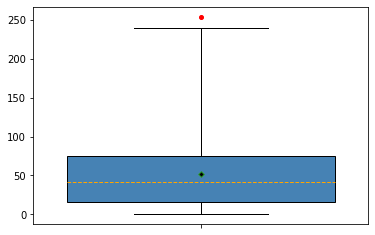

In [6]:
# 绘制箱线图（1.5倍的四分位差，如需绘制3倍的四分位差，只需调整whis参数）
plt.boxplot(x = sunspots['Sunspots'], # 指定绘制箱线图的数据         
            whis = 3, # 指定3倍的四分位差         
            widths = 0.8, # 指定箱线图的宽度为0.8         
            patch_artist = True, # 指定需要填充箱体颜色         
            showmeans = True, # 指定需要显示均值         
            boxprops = {'facecolor':'steelblue'}, # 指定箱体的填充色为铁蓝色        
            # 指定异常点的填充色、边框色和大小         
            flierprops = {'markerfacecolor':'red', 'markeredgecolor':'red', 'markersize':4},          
            # 指定均值点的标记符号（菱形）、填充色和大小        
            meanprops = {'marker':'D','markerfacecolor':'black', 'markersize':4},          
            medianprops = {'linestyle':'--','color':'orange'}, # 指定中位数的标记符号（虚线）和颜色         
            labels = [''] # 去除箱线图的x轴刻度值         
           )
# 显示图形
plt.show()

In [9]:
# 计算下四分位数和上四分位
Q1 = sunspots['Sunspots'].quantile(q = 0.25)
Q3 = sunspots['Sunspots'].quantile(q = 0.75)
# 基于3倍的四分位差计算上下须对应的值
low_whisker = Q1 - 3*(Q3 - Q1)
up_whisker = Q3 + 3*(Q3 - Q1)
# 寻找异常点
res = sunspots.Sunspots[(sunspots.Sunspots > up_whisker) | (sunspots.Sunspots < low_whisker)]

In [10]:
# 极端异常值
res

2505    253.8
Name: Sunspots, dtype: float64

In [25]:
# 删除极端异常值
sunspots = sunspots.drop(res.index)
sunspots = sunspots.reset_index(drop=True)

In [26]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2819 non-null   object 
 1   Sunspots  2819 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


### 1.2 正态分布图参考线法

![](正态分布图.png)
![](正态分布图异常值判断标准.png)

In [32]:
# 导入数据，以太阳黑子数量数据为例
pay_ratio = pd.read_csv('monthly-sunspots.csv')

In [33]:
pay_ratio.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [34]:
pay_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


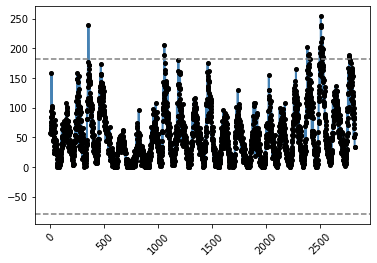

In [35]:
# 绘制单条折线图，并在折线图的基础上添加点图
plt.plot(pay_ratio.index, # x轴数据      
         pay_ratio['Sunspots'], # y轴数据      
         linestyle = '-', # 设置折线类型      
         linewidth = 2, # 设置线条宽度      
         color = 'steelblue', # 设置折线颜色      
         marker = 'o', # 往折线图中添加圆点      
         markersize = 4, # 设置点的大小      
         markeredgecolor='black', # 设置点的边框色      
         markerfacecolor='black') # 设置点的填充色

# 添加上下界的水平参考线（便于判断异常点，如需判断极端异常点，只需将2改为3）
plt.axhline(y = pay_ratio.Sunspots.mean() - 3* pay_ratio.Sunspots.std(), linestyle = '--', color = 'gray')
plt.axhline(y = pay_ratio.Sunspots.mean() + 3* pay_ratio.Sunspots.std(), linestyle = '--', color = 'gray')
# 为了避免x轴刻度标签的紧凑，将刻度标签旋转45度
plt.xticks(rotation=45)

# 导入模块，用于日期刻度的修改（因为默认格式下的日期刻度标签并不是很友好）
# import matplotlib as mpl
# # 获取图的坐标信息
# ax = plt.gca()
# # 设置日期的显示格式  
# date_format = mpl.dates.DateFormatter("%Y-%m")  
# ax.xaxis.set_major_formatter(date_format) 
# # 设置x轴每个刻度的间隔天数
# xlocator = mpl.ticker.MultipleLocator(180)
# ax.xaxis.set_major_locator(xlocator)

# 显示图形
plt.show()

In [36]:
# 计算判断异常点和极端异常点的临界值
# outlier_ll = pay_ratio.Sunspots.mean() - 2* pay_ratio.Sunspots.std()
# outlier_ul = pay_ratio.Sunspots.mean() + 2* pay_ratio.Sunspots.std()
extreme_outlier_ll = pay_ratio.Sunspots.mean() - 3* pay_ratio.Sunspots.std()
extreme_outlier_ul = pay_ratio.Sunspots.mean() + 3* pay_ratio.Sunspots.std()
# 寻找异常点
# outlier_res = pay_ratio.loc[(pay_ratio.Sunspots > outlier_ul) | (pay_ratio.Sunspots < outlier_ll), :]
# 寻找极端异常点
extreme_outlier_res = pay_ratio.loc[(pay_ratio.Sunspots > extreme_outlier_ul) | (pay_ratio.Sunspots < extreme_outlier_ll), :]

In [37]:
# 极端异常值
extreme_outlier_res

,Month,Sunspots
352,1778-05,238.9
1055,1836-12,206.2
1056,1837-01,188.0
2380,1947-05,201.3
2383,1947-08,188.8
2391,1948-04,189.7
2401,1949-02,182.3
2494,1956-11,201.3
2495,1956-12,192.1
2501,1957-06,200.7


In [38]:
# 删除极端异常值
pay_ratio = sunspots.drop(extreme_outlier_res.index)
pay_ratio = pay_ratio.reset_index(drop=True)

In [39]:
pay_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2792 non-null   object 
 1   Sunspots  2792 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB


### 1.3 结论

## 2.中心化

In [19]:
import pandas as pd 

In [20]:
# 导入数据，以太阳黑子数量数据为例
data = pd.read_csv("monthly-sunspots.csv")

In [21]:
data.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


In [23]:
# 求数据的均值
sunspots_mean = data['Sunspots'].mean()
sunspots_mean

51.265957446808514

In [24]:
#中心化
data['Sunspots'] = round(data['Sunspots'] - sunspots_mean, 3)
data

,Month,Sunspots
0,1749-01,6.734
1,1749-02,11.334
2,1749-03,18.734
3,1749-04,4.434
4,1749-05,33.734
...,...,...
2815,1983-08,20.534
2816,1983-09,-0.966
2817,1983-10,4.534
2818,1983-11,-17.966


## 3.共线性筛选

In [8]:
import pandas as pd 

In [26]:
# 读入数据，以波士顿房价数据为例
data = pd.read_csv("House.csv")

In [27]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
# 读入参数
threshold = 0.8
target = 'MEDV'
x = data.drop(["MEDV"], axis=1)

# 计算相关性
corrs = x.corr()
corrs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [13]:
# 找出共线性高的变量
above_threshold_vars = {}
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])
above_threshold_vars

{'CRIM': ['CRIM'],
 'ZN': ['ZN'],
 'INDUS': ['INDUS'],
 'CHAS': ['CHAS'],
 'NOX': ['NOX'],
 'RM': ['RM'],
 'AGE': ['AGE'],
 'DIS': ['DIS'],
 'RAD': ['RAD', 'TAX'],
 'TAX': ['RAD', 'TAX'],
 'PTRATIO': ['PTRATIO'],
 'B': ['B'],
 'LSTAT': ['LSTAT']}

In [14]:
# 根据字典中value的长度进行排序
tmp_dict = {}
for k, v in above_threshold_vars.items():
    tmp_dict[k] = len(v)
tmp_dict    

{'CRIM': 1,
 'ZN': 1,
 'INDUS': 1,
 'CHAS': 1,
 'NOX': 1,
 'RM': 1,
 'AGE': 1,
 'DIS': 1,
 'RAD': 2,
 'TAX': 2,
 'PTRATIO': 1,
 'B': 1,
 'LSTAT': 1}

In [15]:
# 统计要删除的变量
import operator
above_threshold_order = sorted(tmp_dict.items(), key = operator.itemgetter(1))

cols_to_remove = []
cols_seen = []
for key, value in above_threshold_order:
    cols_seen.append(key)
    for x in above_threshold_vars[key]:
        if x == key:
            continue
        elif x not in cols_seen:
            cols_to_remove.append(x)

cols_to_remove = list(set(cols_to_remove))
cols_to_remove

['TAX']

In [16]:
# 删除共线性较高的变量
data = data.drop(labels=cols_to_remove, axis=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,22.0
